# À la découverte de notre ADN

##### Germain Salvato-Vallverdu [germain.vallverdu@univ-pau.fr](mailto:germain.vallverdu@univ-pau.fr)

L'objectif de ce TP est de dmettre en pratique le langage python pour construire
et analyser un brin d'[ADN](https://fr.wikipedia.org/wiki/Acide_d%C3%A9soxyribonucl%C3%A9ique).
L'idée est, dans un premier temps, de reprendre les
éléments de base du langage (condition, boucles ...) pour créer des fonctions qui
construise un brin d'ADN, le lisent, réalise une transcription une traduction ...
puis d'écrire une classe qui réalise ces actions.

## Introduction

Ce n'est pas l'objet de faire ici un cours complet sur l'ADN. Vous trouverez
de nombreuses choses sur le sujet. On va juste rappeler quelques éléments de base
pour qu'un *non biologiste* puisse faire le TP.

### ADN ?

L'ADN, pour Acide DésoxyriboNucléique, est une macromolécule constituée de deux
brins qui forme une double hélice maintenue par des liaisons hydrogène. Ces brins
sont formés par un enchainement de maillons appelés, nucléotides qui contiennent
les *bases* de l'ADN :

* A pour Adénine
* T pour Thymine
* G pour Guanine
* C pour Cytosine

Les bases de l'ADN fonctionnent par paire, une sur chaque brin : adénine avec
thymine et guanine avec cytosine.

[![DNA](./DNA.png)](https://commons.wikimedia.org/wiki/File:DNA_chemical_structure-1-.fr.svg)

### Traduction et transcription

**La transcription** est un mécanisme qui permet de "recopier" l'ADN dans le noyau
de la cellule pour former un ARN (acide ribonucléique) qui sera utilisé dans la
cellule notamment lors de la traduction. L'ARN présente la même structure que
l'ADN mais lors de la transicription, la thymine (T) est remplacé par l'uracile
(U).

**La traduction de l'ADN** consiste à lire l'ARN issue de la transcription pour
synthétiser une protéine avec l'aide de la machinerie cellulaire. L'ARN est
découpé en codons qui sont constitués de 3 bases et correspondent à un 
[acide aminé](https://fr.wikipedia.org/wiki/Acide_amin%C3%A9_prot%C3%A9inog%C3%A8ne), 
c'est le code génétique. Les codons sont lus les uns à la suite des
autres et la protéines est assemblée comme une chaîne (peptidique)
[d'acides aminés](https://fr.wikipedia.org/wiki/Acide_amin%C3%A9_prot%C3%A9inog%C3%A8ne).

![traduction de l'ADN](./traduction.png)

### Correspondance codons - acides aminés

Le schéma ci-dessous vous donne la correspondance entre un codon, composé de
trois bases de l'ARN et un
[acide aminé](https://fr.wikipedia.org/wiki/Acide_amin%C3%A9_prot%C3%A9inog%C3%A8ne).

[![code génétique](./codegenetique.png)](http://www.cours-pharmacie.com/biologie-moleculaire)

Par exemple, GUA est un codon qui code pour l'acide aminé Val, c'est à dire
la Valine. On remarquera que plusieurs codons peuvent coder pour le même acide
aminé ce qui limite la portée des erreurs de copies ou des mutations. On note
également la présence de codons STOP indiquant la fin de la partie "codante" et
qui stoppe la synthèse de la protéine.

## Les dictionnaires python

Pour entrer le code génétique dans python on pourra utiliser les dictionnaires.
Ces objets python sont un peu comme des listes ils contiennent plusieurs autres
objets. À la différence des listes, les éléments d'un dictionnaire sont repérés
par une clef et non par un indice. On peut utiliser tout type de clef : des
nombres, des chaînes de caractères ou même des tuples.

### Petit aperçu

In [21]:
aa = dict()
print(aa)

{}


Une liste est délimitée par des crochets, un dictionnaire par des accolades. Par contre, comme pour les listes, La clef est donnée entre crochets :

In [22]:
aa["M"] = "Met"
aa["L"] = "Leu"
aa["A"] = "Ala"
print("dictionnaire : ", aa)
print("un élément   : ", aa["L"])

dictionnaire :  {'M': 'Met', 'A': 'Ala', 'L': 'Leu'}
un élément   :  Leu


*Remarque :* Les dictionnaires ne sont pas ordonnés. On voit sur l'exemple
ci-dessus que bien que la clef "A" ait été ajoutée en dernier, elle apparait
en premier dans le dictionnaire.

On peut lister les `clefs` et les `valeurs` d'un dictionnaire ou les deux et 
les parcourir avec une boucle `for`.

Liste des clefs :

In [23]:
print(aa.keys())
for key in aa:
    print(key)

dict_keys(['M', 'A', 'L'])
M
A
L


Pour les valeurs :

In [24]:
print(aa.values())
for val in aa.values():
    print(val)

dict_values(['Met', 'Ala', 'Leu'])
Met
Ala
Leu


On peut aussi parcourir les deux simultanément :

In [25]:
print(aa.items())
for key, val in aa.items():
    print(key, " = ", val)

dict_items([('M', 'Met'), ('A', 'Ala'), ('L', 'Leu')])
M  =  Met
A  =  Ala
L  =  Leu


`aa.items()` retourne une liste de tuple de la forme `(clef, valeur)`.

### Petit exercice 

1. Construire un dictionnaire qui met en relation le code à une lettre et le 
   code à trois lettre des acides aminés. 
   [Voir ce tableau](https://fr.wikipedia.org/wiki/Acide_amin%C3%A9_prot%C3%A9inog%C3%A8ne#Propri.C3.A9t.C3.A9s_chimiques).
2. Construire un dictionnaire qui pour un acide aminé donné donne plusieurs
   informations :
   * Code à 1 lettre,
   * Code à 3 lettres,
   * Polarité
   * Masse 
   * pI
   * ...
3. Afficher le nombre d'acides aminés contenus dans le dictionnaire
4. Afficher la liste des acides aminés polaires

**Conseil :** Les dictionnaires sont des objets permettant de structurer des
données. C'est un modèle simpliste de base de données. Il est tout à fait possible
de les imbriquer.

### Pour le code génétique

Pour le code génétique on peut envisager plusieurs solutions :

* la clef est un tuple correspondant au codon :

In [26]:
gencode = {("A", "U", "A"): "Ile", ("U", "G", "A"): "STOP"}
print(gencode)

{('U', 'G', 'A'): 'STOP', ('A', 'U', 'A'): 'Ile'}


* la clef est un acide aminé, la valeur est la liste des codons associés

In [27]:
gencode = {"Phe": ["UUU", "UUC"], "Met": ["AUG"]}
print(gencode)

{'Met': ['AUG'], 'Phe': ['UUU', 'UUC']}


## Questions

L'idée est d'écrire dans un premier temps des fonctions qui réalisent les
opérations suivantes puis d'écrire une classe qui contient les même
fonctionnalités.

1. Écrire une fonction qui génère aléatoirement un brin d'ADN. On pourra choisir
   aléatoirement un codon STOP pour terminer le brin ou la partie codante.
2. Écrire une fonction qui écrit le brin d'ADN dans un fichier
3. Écrire une fonction qui lit un brin d'ADN dans un fichier
4. Identifier s'il s'agit d'un brin d'ADN ou d'ARN et si ce brin est valide
5. Statistique : extraire les informations suivantes d'un brin d'ADN
    * Nombre total de bases
    * Nombre de codons
    * pourcentage de chaque base dans le brin
6. Écrire une fonction qui réalise la transcription de l'ADN en ARN
7. Écrire une fonction qui traduit l'ARN et renvoie la chaîne d'acides aminés
   correspondante. Attention, elle doit s'arrêter au codon STOP.
8. Statistique. Extraire des statistiques sur les acides aminés
    * Le nombre d'acides aminés
    * Le pourcentage d'acide aminé polaire
    * Le nombre de chaque acide aminé différent

## Programmation

Commençons par charger les modules dont nous aurons besoin.

In [28]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


### Exercice sur les dictionnaires

En prennant les données de 
[ce tableau](https://fr.wikipedia.org/wiki/Acide_amin%C3%A9_prot%C3%A9inog%C3%A8ne#Propri.C3.A9t.C3.A9s_chimiques)
on va construire une base de données sur les acides aminés.

#### Correspondance des noms

On peut reprendre l'exemple décrit plus haut pour introduire les dictionnaire et le compléter :

In [29]:
aa = dict()
aa["M"] = "Met"
aa["L"] = "Leu"
aa["A"] = "Ala"
print("dictionnaire : ", aa)

dictionnaire :  {'M': 'Met', 'A': 'Ala', 'L': 'Leu'}


Avec tous les acides aminés :

In [30]:
aa = {
    "V": "Val",
    "I": "Ile",
    "L": "Leu",
    "M": "Met",
    "F": "Phe",
    "A": "Ala",
    "P": "Pro",
    "W": "Trp",
    "G": "Gly",
    "Y": "Tyr",
    "S": "Ser",
    "T": "Thr",
    "C": "Cys",
    "N": "Asn",
    "Q": "Gln",
    "R": "Arg",
    "K": "Lys",
    "H": "His",
    "D": "Asp",
    "E": "Glu"    
}
print(aa)

{'V': 'Val', 'C': 'Cys', 'W': 'Trp', 'I': 'Ile', 'Y': 'Tyr', 'K': 'Lys', 'R': 'Arg', 'E': 'Glu', 'D': 'Asp', 'G': 'Gly', 'M': 'Met', 'A': 'Ala', 'Q': 'Gln', 'L': 'Leu', 'T': 'Thr', 'S': 'Ser', 'H': 'His', 'F': 'Phe', 'N': 'Asn', 'P': 'Pro'}


#### Base de données plus complète 

Pour cela on va *imbriquer* des dictionnaires. Voici un exemple pour un acide aminé :

In [31]:
aa = {
    "Valine": {
        "A": "V",
        "Abr": "Val",
        "masse": 117.14784,
        "pI": 5.96,
        "polaire": False
    }
}

On peut ensuite utiliser nos données de la façon suivante :

In [32]:
print("masse = ", aa["Valine"]["masse"])
print("Abreviation : ", aa["Valine"]["Abr"])

masse =  117.14784
Abreviation :  Val


Voici le dictionnaire complet :

In [33]:
acideAmine = {
    "Alanine": {
        "A": "A",
        "Abr": "Ala",
        "masse": 89.09404,
        "pI": 6.00,
        "polaire": False
    },
    "Arginine": {
        "A": "R",
        "Abr": "Arg",
        "masse": 174.20274,
        "pI": 10.76,
        "polaire": True
    },
    "Asparagine": {
        "A": "N",
        "Abr": "Asn",
        "masse": 132.11904,
        "pI": 5.41,
        "polaire": True
    },
    "Aspartate": {
        "A": "D",
        "Abr": "Asp",
        "masse": 133.10384,
        "pI": 2.77,
        "polaire": True
    },
    "Cystéine": {
        "A": "C",
        "Abr": "Cys",
        "masse": 121.15404,
        "pI": 5.07,
        "polaire": False
    },
    "Glutamate": {
        "A": "E",
        "Abr": "Glu",
        "masse": 147.13074,
        "pI": 3.22,
        "polaire": True
    },
    "Glutamine": {
        "A": "Q",
        "Abr": "Gln",
        "masse": 146.14594,
        "pI": 5.65,
        "polaire": True
    },
    "Glycine": {
        "A": "G",
        "Abr": "Gly",
        "masse": 75.06714,
        "pI": 5.97,
        "polaire": False
    },
    "Histidine": {
        "A": "H",
        "Abr": "His",
        "masse": 155.15634,
        "pI": 7.59,
        "polaire": True
    },
    "Isoleucine": {
        "A": "I",
        "Abr": "Ile",
        "masse": 131.17464,
        "pI": 6.02,
        "polaire": False
    },
    "Leucine": {
        "A": "L",
        "Abr": "Leu",
        "masse": 131.17464,
        "pI": 5.98,
        "polaire": False
    },
    "Lysine": {
        "A": "K",
        "Abr": "Lys",
        "masse": 146.18934,
        "pI": 9.74,
        "polaire": True
    },
    "Methionine": {
        "A": "M",
        "Abr": "Met",
        "masse": 149.20784,
        "pI": 5.74,
        "polaire": False
    },
    "Phénylalanine": {
        "A": "F",
        "Abr": "Phe",
        "masse": 165.19184,
        "pI": 5.48,
        "polaire": False
    },
    "Proline": {
        "A": "P",
        "Abr": "Pro",
        "masse": 115.13194,
        "pI": 6.30,
        "polaire": False
    },
    "Sérine": {
        "A": "S",
        "Abr": "Ser",
        "masse": 105.09344,
        "pI": 5.68,
        "polaire": True
    },
    "Thréonine": {
        "A": "T",
        "Abr": "Thr",
        "masse": 119.12034,
        "pI": 5.60,
        "polaire": True
    },
    "Tryptophane": {
        "A": "W",
        "Abr": "Trp",
        "masse": 204.22844,
        "pI": 5.89,
        "polaire": False
    },
    "Tyrosine": {
        "A": "Y",
        "Abr": "Tyr",
        "masse": 181.19124,
        "pI": 5.66,
        "polaire": True
    },
    "Valine": {
        "A": "V",
        "Abr": "Val",
        "masse": 117.14784,
        "pI": 5.96,
        "polaire": False
    }
}

#### Lecture des données

Essayons maintenant de lire des données. Par exemple le nombre d'acides aminés :

In [34]:
print(len(acideAmine.keys()))

20


La liste des acides aminés polaires :

In [35]:
print("Liste des acides aminés polaires :")
for nom, data in acideAmine.items():
    if data["polaire"]:
        print("  * ", nom)

Liste des acides aminés polaires :
  *  Aspartate
  *  Asparagine
  *  Histidine
  *  Arginine
  *  Glutamate
  *  Lysine
  *  Tyrosine
  *  Sérine
  *  Thréonine
  *  Glutamine


Ou en une seule ligne avec une compréhension de liste :

In [36]:
print([nom for nom, data in acideAmine.items() if data["polaire"]])

['Aspartate', 'Asparagine', 'Histidine', 'Arginine', 'Glutamate', 'Lysine', 'Tyrosine', 'Sérine', 'Thréonine', 'Glutamine']


### Construire aléatoirement un brin d'ADN

Définissons tout d'abord quelques constantes

In [37]:
BASE_ADN = ["A", "T", "C", "G"]
BASE_ARN = ["A", "U", "C", "G"]
STOP = ["TAA", "TAG", "TGA"]

On va utiliser la fonction `randint()` de numpy pour choisir aléatoirement une base.

In [38]:
def gen_brins(nbases=10, typ="ADN"):
    """ 
    génère un fragment d'ADN ou ARN contenant nbases dont un codon stop à la fin

    Args:
        nbases (int): nombre de bases
        typ (str): "ADN" ou "ARN"

    Return:
        fragment (str): le fragment d'ADN
    """
    # type ADN ou ARN
    if typ == "ADN":
        bases = BASE_ADN
    elif typ == "ARN":
        bases = BASE_ARN
    else:
        raise ValueError("typ doit être 'ARN' ou 'ADN', typ = %s" % typ)
    
    # construction fragment ADN
    # nbases % 3 est le reste de la division de nbases par 3
    # on prend nbases - nbases % 3 pour avoir un multiple de 3
    fragment = "".join([bases[np.random.randint(0, 4)] for i in range(nbases - nbases % 3)])

    codon_stop = STOP[np.random.randint(0, 2)]
    if typ == "ARN":
        codon_stop.replace("T", "U")
    # on remplace les 3 dernières bases par le codon STOP
    fragment = fragment[:-3] + codon_stop

    return fragment

Utilisons notre fonction :

In [39]:
brin = gen_brins(10)
print(brin)
print(len(brin))

AATGTGTAG
9


On a un brin de 12 bases avec les trois dernières qui correspondent à un codon STOP.

### Écrire le brin dans un fichier

On va simplement écrire la chaîne de caractère dans un fichier :

In [40]:
def write_file(fragment, fichier="brin.dat"):
    """ Écrit le fragment dans un fichier """
    with open(fichier, "w") as f:
        f.write(fragment)

Pour avoir un fichier plus lisible, on pourrait choisir d'afficher un certain nombre de codons par ligne avec un séparateur donné entre chaque codon :

In [41]:
def write_file(fragment, fichier="brin.dat", codonParLigne=15, separateur=" "):
    """ 
    Ecrit le fragment dans un fichier 
   
    Args:
       fichier (str): nom du fichier.
       fragment (str): fragment d'ADN
       codonParLigne (int): nombre de codons par ligne.
       separateur (str): séparateur des codons
    """

    # calcul nombre de codons dans le fragment
    ncodon = len(fragment) // 3

    with open(fichier, "w") as out:
        n = 0
        while n < ncodon:
            out.write(fragment[3*n : 3*n + 3] + separateur)
            n += 1
            if n % codonParLigne == 0:
                out.write("\n")

Le symbole `//` désigne une division entière.

### Lire le brin dans un fichier

On peut écrire une fonction qui lit de façon directe le fichier et supprime tout les séparateurs ou sauts de ligne.

In [42]:
def read_adn(fichier, separateur=" "):
    """ lit un brin d'ADN sur un fichier """
    with open(fichier, "r") as f:
        fragment = f.read()
    fragment = fragment.replace(separateur, "").replace("\n", "")
    return fragment

Exemple d'utilisation :

In [43]:
fragment = gen_brins(100)
print(fragment)
write_file(fragment, codonParLigne=5)

ATCGTTTAGCTATATTTGCCCTTCAACCGAAACCAACTGCAGTTCTGGTTTAAGTGGAGCTGATGGCTCGTCTCGCCGCCATTGGTATTCCGATGTTAA


In [44]:
!cat brin.dat

ATC GTT TAG CTA TAT 
TTG CCC TTC AAC CGA 
AAC CAA CTG CAG TTC 
TGG TTT AAG TGG AGC 
TGA TGG CTC GTC TCG 
CCG CCA TTG GTA TTC 
CGA TGT TAA 

In [45]:
read_adn("brin.dat")

'ATCGTTTAGCTATATTTGCCCTTCAACCGAAACCAACTGCAGTTCTGGTTTAAGTGGAGCTGATGGCTCGTCTCGCCGCCATTGGTATTCCGATGTTAA'

### Identification du brin

Écrivons une fonction qui vérifie si le brin est un brin d'ADN ou d'ARN et s'il est valide. Pour l'exercice, on considèrera que le brin est "valide" s'il contient les bases adéquates et si le nombre de bases est un multiple de 3.

In [46]:
def is_valid(fragment, typ="ADN"):
    """ 
    indique si le fragment est valide contenu du type indiqué 
    
    Args:
        fragment (str): fragment d'ADN ou ARN
        typ (str): "ADN" ou "ARN"
    
    Returns
        True or False
    """
    # type ADN ou ARN
    if typ == "ADN":
        bases = BASE_ADN
    elif typ == "ARN":
        bases = BASE_ARN
    else:
        raise ValueError("typ doit être 'ARN' ou 'ADN', typ = %s" % typ)
        
    # valeur retournée
    valid = True
    
    # test multiple de 3
    if len(fragment) % 3 != 0:
        valid = False
        print("Error number of bases")
    # test des bases :
    else:
        for base in fragment:
            if base not in bases:
                valid = False
                print("Error : ", base, " is not valid.")
                break
    
    return valid

Test de notre fonction :

In [47]:
adn_ok = "TAATCCTAAAACCCT"
adn_bad = "TAATCCTAAAACCT" # nbre de bases
arn_ok = "UAAUCCUAAAACCCU"
arn_bad = "UAAUYCUAAXACCCU" # nom des bases
print("adn_ok  : ", is_valid(adn_ok))
print("adn_bad : ", is_valid(adn_bad))
print("arn_ok  : ", is_valid(arn_ok, typ="ARN"))
print("arn_bad : ", is_valid(arn_bad, typ="ARN"))

adn_ok  :  True
Error number of bases
adn_bad :  False
arn_ok  :  True
Error :  Y  is not valid.
arn_bad :  False


### Statistiques sur le brin

Extraire les informations suivantes d'un brin d'ADN

* Nombre total de bases
* Nombre de codons
* pourcentage de chaque base dans le brin

Le nombre total de bases et de codon est donné par la fonction `len()`.

In [48]:
adn = gen_brins(18)
print(adn)

CCCTCAGGACAGTTTTAA


In [49]:
print("nombre de bases : ", len(adn))

nombre de bases :  18


In [50]:
print("nombre de codons : ", len(adn) // 3)

nombre de codons :  6


Calculons maintenant le nombre de chaque base. Nous allons utiliser la méthode `count()` de l'objet `str`.

In [51]:
adn.count("T")

5

Écriture de la fonction :

In [52]:
def get_stat_base(fragment, typ="ADN"):
    """ Compte le nombre de chaque type de base et retourne un dictionnaire """
    # type ADN ou ARN
    if typ == "ADN":
        bases = BASE_ADN
    elif typ == "ARN":
        bases = BASE_ARN
    else:
        raise ValueError("typ doit être 'ARN' ou 'ADN', typ = %s" % typ)
    # comptage
    data = dict()
    for base in bases:
        data[base] = fragment.count(base)
    return data

Ce qui donne : 

In [53]:
print(adn)
get_stat_base(adn)

CCCTCAGGACAGTTTTAA


{'A': 5, 'C': 5, 'G': 3, 'T': 5}

#### Combinons avec un graphique matplotlib

brin valide ?  True
ATCGGAATCATCCTCCGGGACACTCGTTGCGGAGGTGCCTACTGAGAAGGTGATCCATCTAACTACCACCCCCCGATGGCTTCAGGCCGTATTATAATAGTCCCATTGCATGTACAATCCCATGACCGCCAGGTGCAGGTCAGGTCGTGATGCCTTGTGGACACTACACTTCCCCTAACGGCCCGTACAAACCTTCGTGCGGGTATCAAGGCTAAGTTATCGTTAGCACTTCCTAGCTCAGACCCTAGTCTGCGAGGTTGCTCATGCCTACGGTACTTGTGGCAAGTCATCGAAGAAACGAGATGGCAACATTTGGGGTGGGGGGGGCCGTCATTTGAACTAGTCGCCGGCGCGATTTGAGAATAAAAAAGAAACTGGCTAATTCCCGCTGCAACGCTGTAGATATATGCCACCAGTTCCGCCTCTACTTTGAAGATACTGTCTCCTGCGACTTAACTAAAGCGACATCATCTATGTCGCTGGGCTACTCCTCCAAATGGAGAGCCTAGTTGGTAAATCAATGGTGCGCAGTTTATAAAATCGAAGGTCGACATAGGTCCTCACGTGGTCTTTCGTTTCAGGCGCATGTCAGTAGCATCTAATACTTGAACTCTATTCCGCATTGTAGCCCTAGTTGCTCCAGTATGAGTGAAATGCTTTGTATGGGGGTGGAGGCATCGCGCCCCTACACTAGAGGCTGAGGCCTAAGGCATGATTTCATGGTGATAATAAAGTTCTGCCTCTATGGGCCAGTCTAGCAACCTCGTGTGCTCCCTCAAACCAAAATAACAAGAGGATGTACCCGACTTTCAGCTCTGACGCATCCCATACCCCTGGTCCTTATCAGGACGCTATTCGCAAGGAATAAAAGGGGTAGTTACTCGAGATTTGGCGCAGATCTCGAGACAACGAGATGGTAGGGTGAGTGCGACCCAAACAGCTTATGTTGCTGCTCGGGACCGACACTGTTAAAAAGTAGA

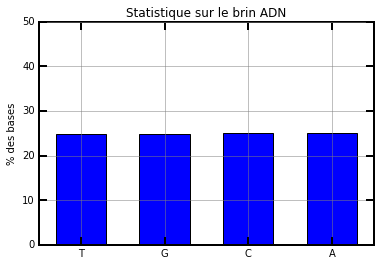

In [54]:
# construction d'un brin
adn = gen_brins(1000)
print("brin valide ? ", is_valid(adn))
print(adn)

# calcul du nombre de chaque type de base
print("\nStatistique :")
data = get_stat_base(adn)
print(data)

# graphique matplotlib
plt.bar([x + .2 for x in range(4)], [(n / len(adn)) * 100. for n in data.values()], width=.6)
plt.ylabel("% des bases")
plt.xticks([x + .5 for x in range(4)], list(data.keys()))
plt.xlim()
plt.ylim(0, 50)
plt.title("Statistique sur le brin ADN")

### Transcription de l'ADN

Cette fonction est très simple à écrire. On utilise la fonction `replace()` de l'objet `str`.

In [55]:
def transcription(fragment):
    """
    Transcrit un brin d'ADN (base A T C G) en brin d'ARN (base A U C G).
    
    Args:
        fragment (str): fragment d'ADN
        
    Return:
        arn (str): fragment d'ARN
    """
    return fragment.replace("T", "U")

Test de la fonction :

In [56]:
adn = gen_brins(21)
print(adn)
arn = transcription(adn)
print(arn)

GCTCCGTTTGTGCCCTCCTAG
GCUCCGUUUGUGCCCUCCUAG


### Traduction de l'ARN

Pour l'étape de traduction, il nous faut le code génétique. Commençons par écrire un dictionnaire qui contient le code. Les clefs du dictionnaire seront les codes à trois lettres des acides-aminés. Pour chaque acide aminé, on associe la liste des codons correspondant. 

In [57]:
# code genetique
geneticCode = {"Leu": ["UUA", "UUG", "CUU", "CUC", "CUA", "CUG"],
               "Phe": ["UUU", "UUC"],
               "Ile": ["AUU", "AUC", "AUA"],
               "Met": ["AUG"],
               "Val": ["GUU", "GUC", "GUA", "GUG"],
               "Ser": ["UCU", "UCC", "UCA", "UCG", "AGU", "AGC"],
               "Pro": ["CCU", "CCC", "CCA", "CCG"],
               "Thr": ["ACU", "ACC", "ACA", "ACG"],
               "Ala": ["GCU", "GCC", "GCA", "GCG"],
               "Tyr": ["UAU", "UAC"],
               "STOP": ["UAA", "UAG", "UGA"],
               "His": ["CAU", "CAC"],
               "Gln": ["CAA", "CAG"],
               "Asn": ["AAU", "AAC"],
               "Lys": ["AAA", "AAG"],
               "Asp": ["GAU", "GAC"],
               "Glu": ["GAA", "GAG"],
               "Cys": ["UGU", "UGC"],
               "Trp": ["UGG"],
               "Arg": ["CGU", "CGC", "CGA", "CGG", "AGA", "AGG"],
               "Gly": ["GGU", "GGC", "GGA", "GGG"]}

Ensuite on écrit une fonction qui pour un codon donné, retourne le nom de l'acide aminé :

In [58]:
def codon_to_aa(uncodon):
    """
    Renvoie le code à trois lettres d'un acide aminé correspondant au codon
    donné en argument.
    
    Args:
        uncodon (str): codon de l'ARN.
        
    Return:
        acideAmine (str): code à trois lettres de l'acide aminé correspondant.
    """        
    acideAmine = None
    identify = False
    for aa, codons in geneticCode.items():
        if uncodon in codons:
            acideAmine = aa
            identify = True
            break
            
    if not identify:
        raise ValueError("ERREUR : codon '%s' non identifié" % uncodon)

    return acideAmine

Exemples et vérification du bon fonctionnement de la fonction :

In [59]:
print(codon_to_aa("CAA"))

Gln


In [60]:
print(codon_to_aa("AZF"))

ValueError: ERREUR : codon 'AZF' non identifié

Maintenant écrivons la fonction qui traduit tout le brin d'ARN :

In [61]:
def traduction(fragment):
    """
    Traduit le brin d'ARN en séquence peptidique.
    
    Args:
        fragment (str): fragment d'ARN à traduire
        
    Returns:
        sequence (str): séquence peptidique.
    """
    #nombre de codons dans le fragment
    ncodon = len(fragment) // 3
    
    # traduction    
    sequence = ""
    n = 0
    while n < ncodon:
        aa = codon_to_aa(fragment[3*n : 3*n+3])
        if aa != "STOP":
            sequence += aa + "-"
            n += 1
        else:
            sequence += aa
            break
    return sequence

Exemple :

In [62]:
adn = gen_brins(21)
print(adn)
arn = transcription(adn)
print(arn)
sequence = traduction(arn)
print("la sequence contient ", len(sequence.split("-")), "acides aminés")
print(sequence)

GGTTCTTGCCTAAGTCGCTAG
GGUUCUUGCCUAAGUCGCUAG
la sequence contient  7 acides aminés
Gly-Ser-Cys-Leu-Ser-Arg-STOP


### Statistiques sur la séquence d'acides aminés

Extraire les informations suivantes d'une séquence d'acides aminés.

* Le nombre d'acides aminés
* Le pourcentage d'acide aminé polaire
* Le nombre de chaque acide aminé différent

#### Nombre d'acides aminés

On va supposer que la séquence est donnée dans le format de notre fonction `traduction()`. Dans ce cas, les acides aminés sont séparés par un `-`. On va combiner les fonctions `split()` et `len()` pour calculer le nombre d'acides aminés dans la séquence.

In [63]:
def get_nombre_aa(sequence):
    """ 
    Retourne le nombre d'acides aminés dans la séquence. Le codon STOP n'est
    pas compté comme un acide aminé. 
    """
    return len(sequence.split("-")[:-1])

Testons la fonction :

In [64]:
sequence = "Leu-Ser-Ser-Arg-Asn-Arg-STOP"
print("Nombre d'acide amine : ", get_nombre_aa(sequence))

Nombre d'acide amine :  6


#### Pourcentage d'acides aminés polaires

Nous allons nous servir du dictionnaire `acideAmine` pour connaître la polarité de chaque acide aminé.

In [65]:
def get_polarite(sequence):
    """
    Retourne le pourcentage d'acides aminés polaires dans une séquence.
    """
    # liste des acides aminés sauf codon STOP
    listeaa = sequence.split("-")[:-1]
    
    npolaire = 0
    for aa in listeaa:
        for aaname in acideAmine:
            if acideAmine[aaname]["Abr"] == aa and acideAmine[aaname]["polaire"]:
                npolaire += 1
    return npolaire / len(listeaa) * 100.

Test de la fonction :

In [66]:
sequence = "Leu-Ser-Ser-Arg-Asn-Arg-STOP"
print("pourcentage d'acides amines polaires : ", get_polarite(sequence))

pourcentage d'acides amines polaires :  83.33333333333334


**Remarque :** Cette implémentation est particulièrement inefficace car il faut parcourir tout le dictionnaire `acideAmine` pour chaque acide aminé de la séquence.

#### Nombre de chaque acide aminé différent

In [67]:
def get_stat_aa(sequence):
    """ Compte le nombre de chaque type d'acide aminé et retourne un dictionnaire """
    # liste des acides aminés sauf codon STOP
    listeaa_sequence = sequence.split("-")[:-1]
    
    # liste des 20 codes a trois lettres des acides aminés
    listeaa = [acideAmine[aa]["Abr"] for aa in acideAmine]
    
    # statistique
    data = dict()
    for aa in listeaa:
        naa = listeaa_sequence.count(aa)
        if naa != 0:
            data[aa] = naa
    
    return data

Calculs sur notre séquence :

In [68]:
sequence = "Leu-Ser-Ser-Arg-Asn-Arg-STOP"
print("Statistique : ", get_stat_aa(sequence))

Statistique :  {'Asn': 1, 'Ser': 2, 'Arg': 2, 'Leu': 1}


#### Dans un graphique avec matplotlib

Nous allons maintenant combiner les fonctions précédentes pour faire un diagramme avec matplotlib qui remplit les conditions suivantes :

* Il affiche le nombre de chaque acide aminé dans la séquence
* Les acides aminés polaires sont en rouge
* Les acides aminés apolaires sont en bleu

brin valide ?  True
GATAATAAATGTTGTTCCATCCGTTCCTCTCAATGGATGTTCTACGCACCCCCGCGACAGGTCTCAGAAACTACCGGGTCCATTGAATCCTCCTGATAATTTGTTGTGAGTAAAGCTTACATTATGTCTACGGGCATATTGTGAAAGCCATTCTGAAGACATACGTCCTGAGGAATAAGCTGGATACCCACACAACAGAGTATGCAGCGGTCGGTAGCCCACGGCGACTCCACCCATAGTGCATACGGTTTGGTGACTTCCAGGGCGCCTGTCGTAGCTGGTTAAAACAGCATGCTAGCTCTAATTTCTTAACACTATTGGTCAACTAAGTACTGATATTCGCAGAAACTATTAGGATTCCACAGTTCGTACCCTAGTGCAGTACCATGTAAGGCGTGGCAACAATCGAGATCCGATATTCCTAACAGTTTACCCCTTACGTGAAGCACTCAACGAAACTACTTCTGCTTCCTCGTCAACGGCGCGCATTCGGTTGTCTAAAAAATAATGGCCGCGCAATCTATCGTTGCTCCACCGAGTGTTGAACAGCTGTCGATACTGGCCATTGAGCGATCAATTCTACCTAATGATGCATCTGATATCAATATCGCGATTGCCTGCATGGGTAGCCAGAAGGCAACGATTAAGGCAAGCGGAGCACGTGGGATTCCTGTTTTAGTCCCAAATAGTGAAACTAGCCATTGTCAGTGTATTTTTGAATTTGGCAGGTCAAACATGATATAGAGGACCGTTCCAATGACAATGGTAATAATGAAAATGCATCCAATAACGATTGAAATAGGCAACGTCCCCTGCTTAGGCAAGATACCTCATATCACTCCGGCATCGTCTTGTACCTGCAGGCAGCAGCTCGTAGCTAAGGGAAGATCTTTACCCGATTAAAAATAAATGGACGGGGCGAATCACCTGGGGGTAGTGGCTATCTGACTAGGACCGGTATCCCGAAGCCCAGAATGTTC

(-1.1907753254325724,
 1.1989738647394892,
 -1.1964101608838691,
 1.1998350110200235)

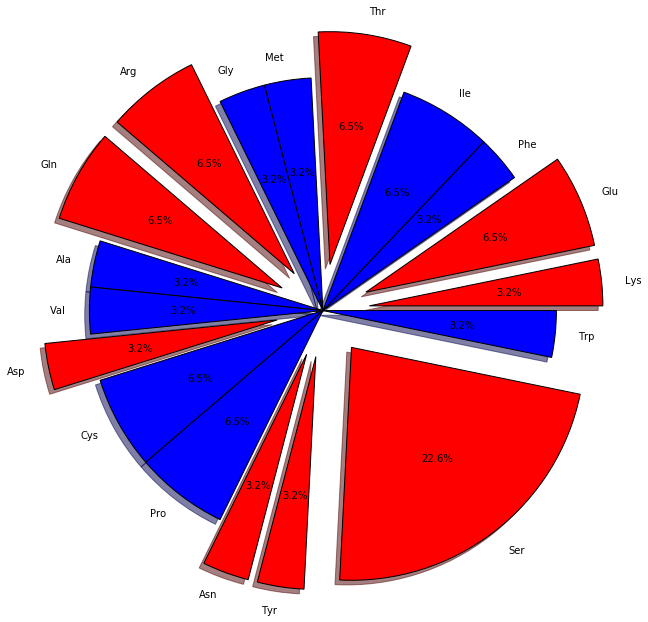

In [78]:
# construction d'un brin
adn = gen_brins(1000)
print("brin valide ? ", is_valid(adn))
print(adn)

# calcul du nombre de chaque type de base
arn = transcription(adn)
sequence = traduction(arn)
print("\nsequence : \n", sequence)
print("Nombre d'acide aminé : ", get_nombre_aa(sequence))
data = get_stat_aa(sequence)
print("\nstatistiques : \n", data)

# construction du graphique de type pie
labels = list(data.keys())
heights = list(data.values())

# définition des couleurs en fonction de la polarité
colors = list()
explode = list()
for aa in labels:
    for aaname in acideAmine:
        if acideAmine[aaname]["Abr"] == aa:
            if acideAmine[aaname]["polaire"]:
                colors.append("red")
                explode.append(0.2)
            else:
                colors.append("blue")
                explode.append(0.)

plt.figure(figsize=(10, 10))
plt.pie(heights, labels=labels, colors=colors, explode=explode,
        shadow=True, autopct='%1.1f%%', startangle=0)
plt.axis("equal")